In [1]:
# Install required packages
!pip install yfinance plotly pandas numpy matplotlib seaborn statsmodels scipy tabulate

In [ ]:
# API Keys
FMP_API_KEY = "Add Key Here"
ALPHA_VANTAGE_API_KEY = "Add Key Here"

Starting comprehensive portfolio backtest...
Running backtest from 2010-05-03 to 2025-04-29


[*********************100%***********************]  179 of 179 completed


Successfully downloaded data for 134 tickers (including benchmark)
Retrieving sector data for 133 tickers...
Using FMP API for 1 tickers with missing sector data...
Successfully retrieved sector data for 133 out of 133 tickers

BACKTEST RESULTS: Multiple Portfolios vs SPY

Portfolio 1 Composition: 99 stocks (equal weighted)
Portfolio 2 Composition: 58 stocks (equal weighted)
Portfolio 3 Composition: 18 stocks (weighted)
Backtest Period: 2012-12-11 to 2025-04-28 (3113 trading days)

COMBINED PERFORMANCE METRICS

Return Metrics


Metric,Portfolio 1 (Equal),Portfolio 2 (Equal),Portfolio 3 (Weighted),SPY
Total Return (%),679.5434,1235.7434,1630.8978,383.5167
Annualized Return (%),18.0851,23.3469,25.9619,13.6066
Win Rate (%),54.0957,54.5776,56.6977,55.1558



Risk Metrics


Metric,Portfolio 1 (Equal),Portfolio 2 (Equal),Portfolio 3 (Weighted),SPY
Annualized Volatility (%),21.2976,23.7324,15.7784,17.1665
Maximum Drawdown (%),-49.4071,-49.9150,-34.5529,-33.7173
Average Drawdown (%),-5.1335,-5.5056,-2.4835,-3.8676
Average Recovery Time (days),15.1017,12.2370,9.9134,10.9362
VaR 95% (%),-1.9476,-2.2010,-1.3141,-1.6146
CVaR 95% (%),-3.1033,-3.4016,-2.2351,-10.2550
Skewness,-0.7120,-0.5115,-0.8276,-0.3248
Kurtosis,15.8097,13.9863,18.8163,14.6275



Risk-Adjusted Metrics


Metric,Portfolio 1 (Equal),Portfolio 2 (Equal),Portfolio 3 (Weighted),SPY
Sharpe Ratio,0.7472,0.8775,1.3527,0.6546
Sortino Ratio,0.8857,1.0956,1.7839,0.7517
Calmar Ratio,0.3660,0.4677,0.7514,0.4036
Treynor Ratio,0.1409,0.1681,0.3158,0.1061
Omega Ratio,1.1493,1.1745,1.2916,1.1345



Relative Performance Metrics


Metric,Portfolio 1 (Equal),Portfolio 2 (Equal),Portfolio 3 (Weighted),SPY
Alpha (%),3.7315,7.5059,15.2508,0
Beta,1.0704,1.2107,0.7270,1
Information Ratio,0.4311,0.7972,0.9411,0
Tracking Error (%),10.8442,12.0255,10.7381,0
Upside Capture Ratio,1.0974,1.2812,0.7701,1
Downside Capture Ratio,1.0609,1.2171,0.6099,1



Sector Weights (%)


,Portfolio 1 (Equal),Portfolio 2 (Equal),Portfolio 3 (Weighted)
Financial Services,19.19,17.24,32.49
Industrials,18.18,24.14,11.61
Healthcare,5.05,10.34,27.27
Consumer Cyclical,16.16,17.24,4.80
Energy,16.16,5.17,5.01
Technology,7.07,13.79,1.50
Consumer Defensive,3.03,3.45,14.70
Basic Materials,9.09,5.17,2.62
Communication Services,5.05,3.45,0.00
Utilities,1.01,0.00,0.00



PERFORMANCE CHARTS


<Figure size 1500x800 with 0 Axes>

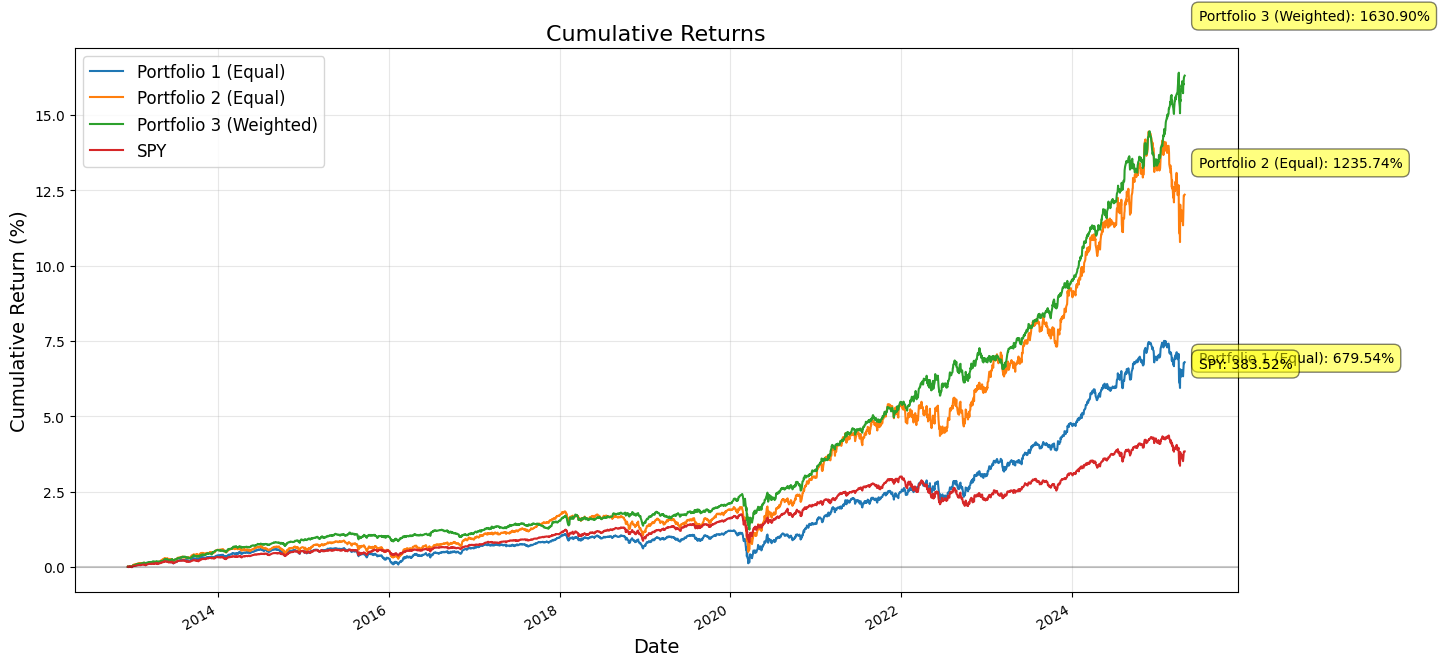

<Figure size 1500x800 with 0 Axes>

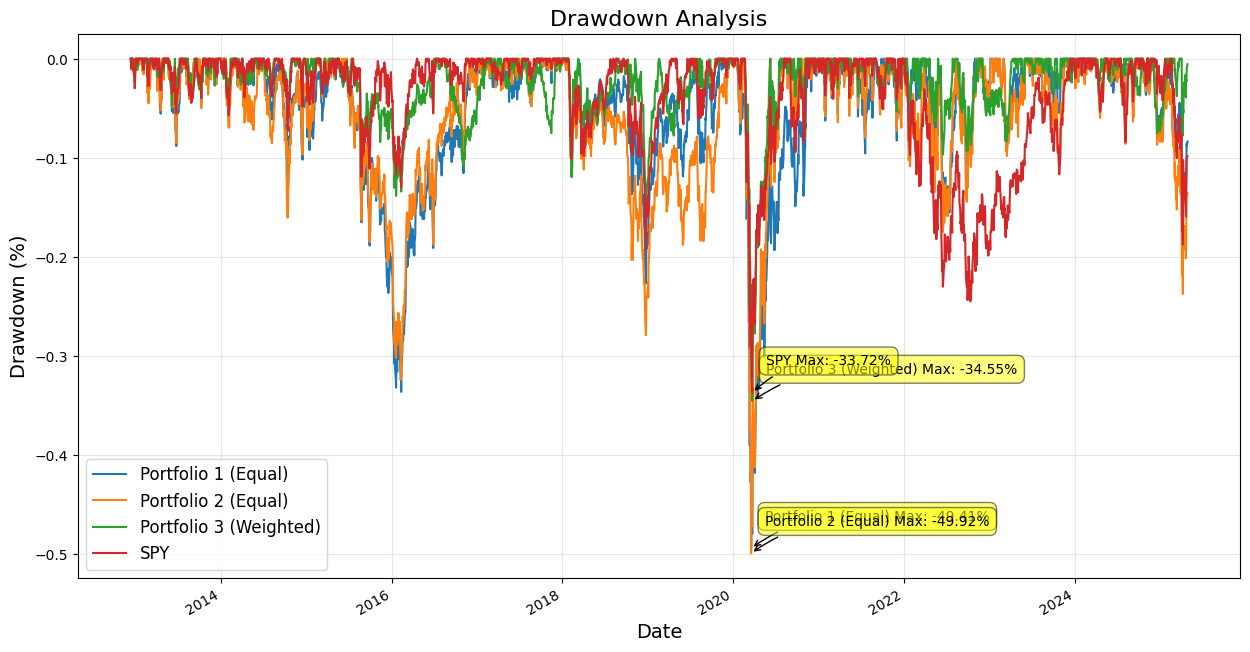

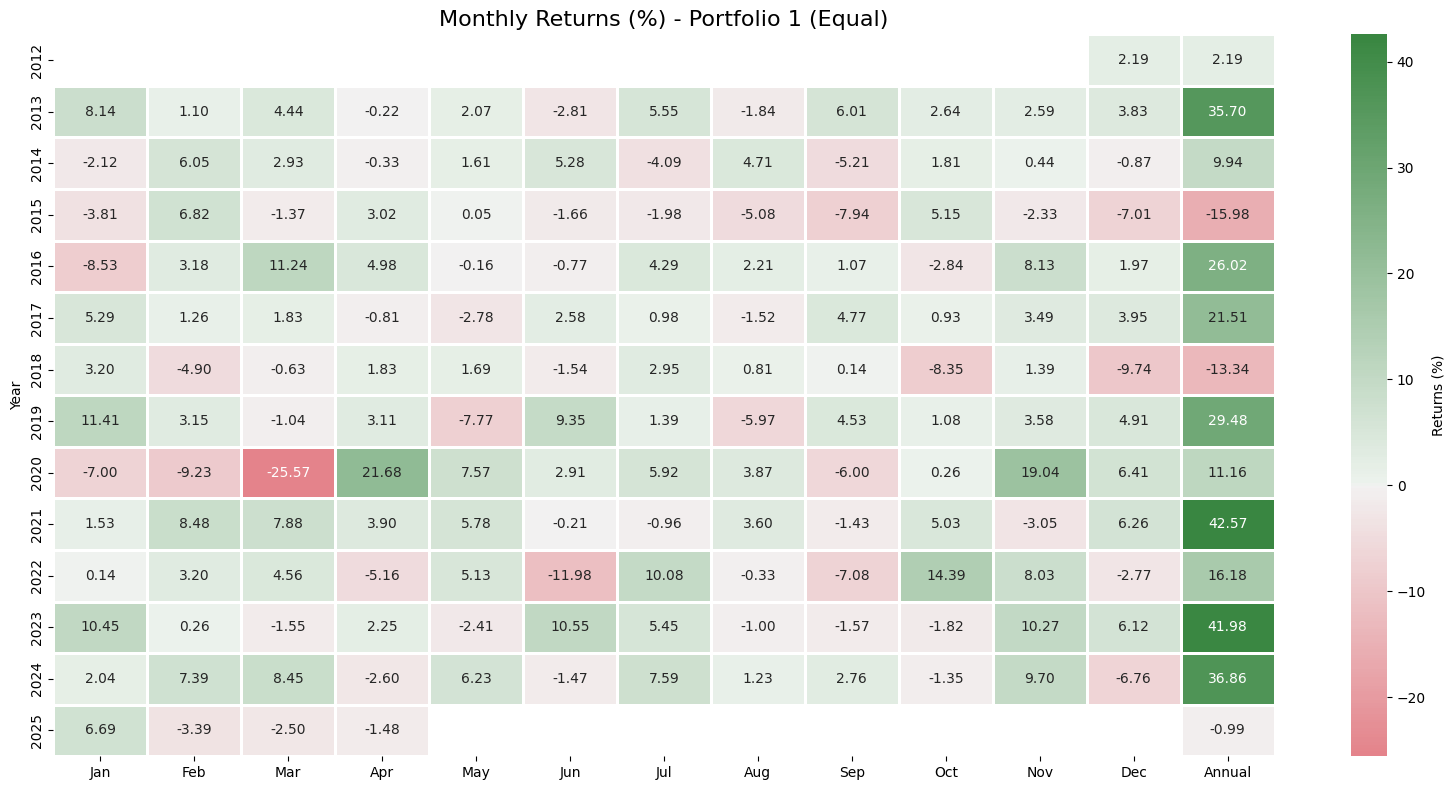

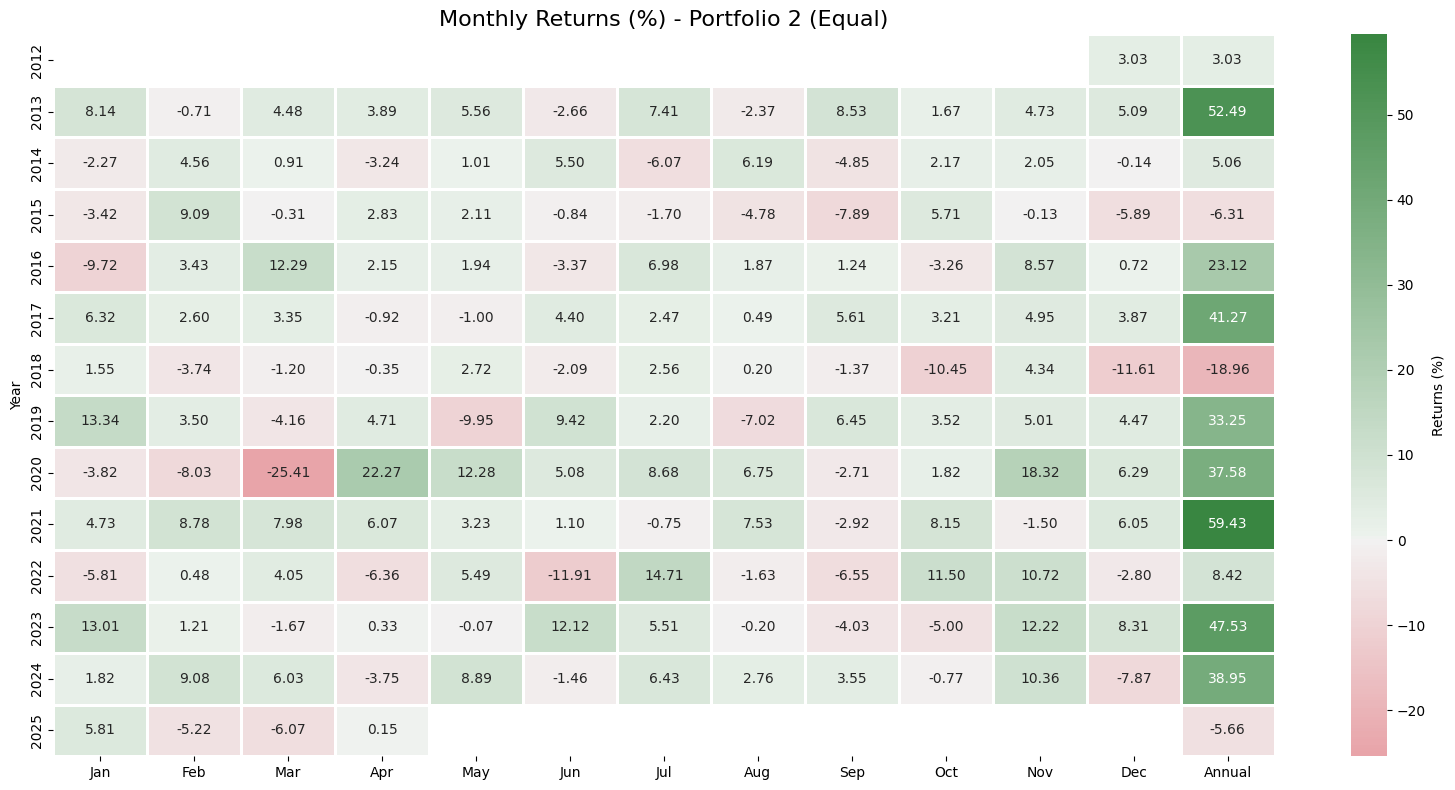

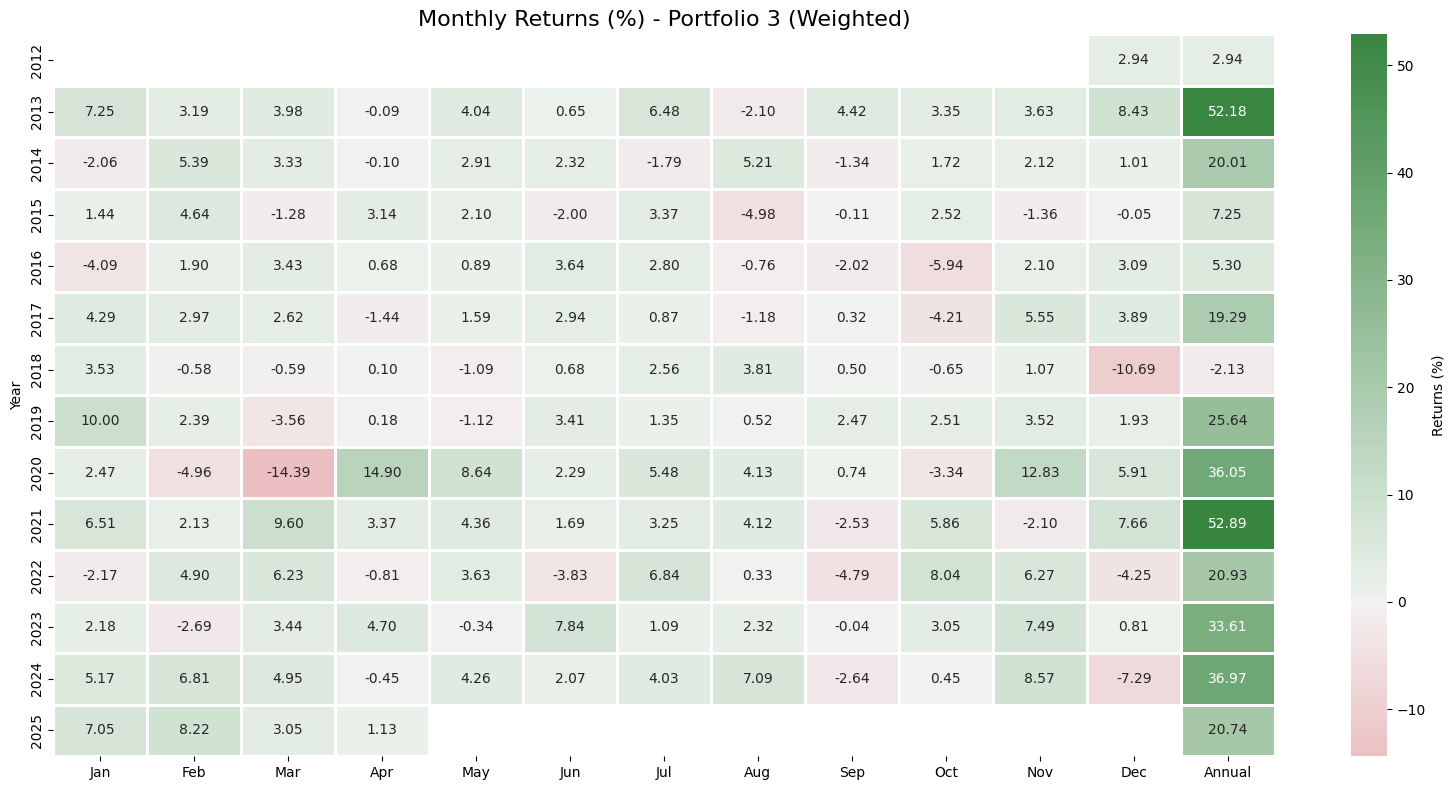

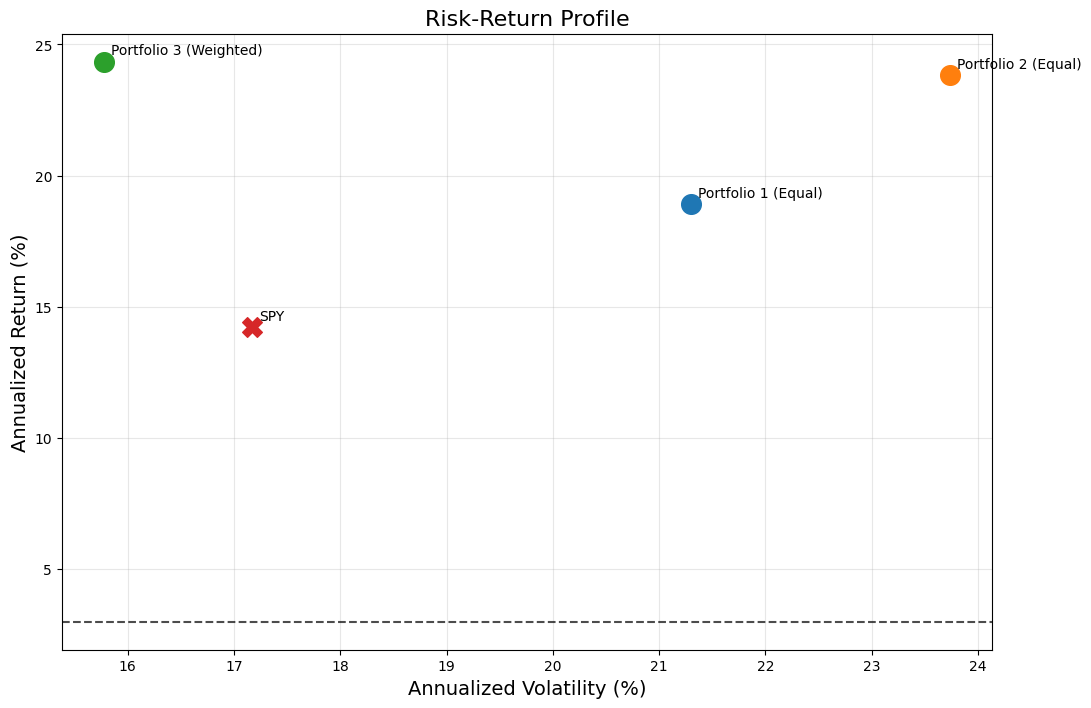


PORTFOLIO OVERLAP ANALYSIS
Overlap between Portfolio 1 and 2: 37 stocks (37.37% of Portfolio 1, 63.79% of Portfolio 2)
Overlap between Portfolio 1 and 3: 5 stocks (5.05% of Portfolio 1, 27.78% of Portfolio 3)
Overlap between Portfolio 2 and 3: 3 stocks (5.17% of Portfolio 2, 16.67% of Portfolio 3)
Backtest completed successfully!


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
import statsmodels.api as sm
import yfinance as yf
from scipy import stats
from tabulate import tabulate
import time



# Define the tickers for portfolio 1
portfolio1_tickers = ["ALL", "ALSN", "AM", "AMP", "APO", "AROC", "ATAT", "ATGE", "ATI", "ATMU",
           "AXP", "AZO", "BBAR", "BKR", "BLBD", "BLDR", "BOOT", "CALM", "CEG", "CF",
           "CHKP", "CLS", "CMC", "CNQ", "COLL", "COP", "COR", "CRH", "CROX", "DELL",
           "DHI", "DHT", "DKS", "DTM", "EGO", "ERJ", "ET", "FBP", "FLEX", "FLR",
           "FTI", "GDDY", "GEHC", "GFF", "GLNG", "GOGL", "GPK", "GRBK", "H", "HAL",
           "HCA", "HESM", "HIG", "HLIT", "HLN", "HMY", "HRB", "HUBB", "IBKR", "IBM",
           "IBN", "INTR", "JBL", "JEF", "KBH", "KEX", "KNTK", "LAUR", "LEN", "LPX",
           "LRN", "MBC", "MCK", "META", "MLI", "MMC", "MPLX", "MRK", "MUFG", "NRG",
           "NTAP", "NVT", "OC", "OII", "ORI", "PAA", "PAGP", "PCAR", "PGR", "PH",
           "PHM", "PKG", "PR", "PRIM", "RCL", "RRC", "SBLK", "SCCO", "SFL", "SFM",
           "SMFG", "STLD", "TBBK", "TECK", "TGLS", "TIMB", "TKC", "TMUS", "TRV", "TSCO",
           "UHS", "VIST", "VIV", "VNOM", "VOO", "WAB", "WCC", "WES", "WHD", "WMB",
           "WSM", "WT", "WTTR", "XOM"]

# Define the tickers for portfolio 2
portfolio2_tickers = ["ACLS", "ACMR", "AMP", "APO", "AROC", "ATAT", "BJ", "BLDR", "BOOT", "BYD",
                      "CARR", "CEG", "CLS", "CNX", "COCO", "CRC", "CROX", "DELL", "DHI", "DKS",
                      "FIX", "FLEX", "FLR", "FSLR", "FUTU", "GDDY", "GFF", "GGAL", "GLNG", "HALO",
                      "HCA", "HUBB", "IBKR", "INTR", "JBL", "JEF", "KKR", "LEN", "LNTH", "LNW",
                      "LPLA", "LPX", "LRN", "MBC", "MCK", "META", "NVT", "OC", "OLLI", "ON",
                      "OPCH", "OPRA", "PDD", "PGR", "PH", "PHM", "PPC", "PR", "PRIM", "RBC",
                      "REGN", "RMBS", "SBLK", "SFM", "SIG", "STLD", "TBBK", "TECK", "TGLS", "TMUS",
                      "TOL", "TSCO", "TSM", "URI", "UTHR", "WAB", "WCC", "WFRD", "WHD", "WMS", "WT"]

# Define the tickers and weights for portfolio 3
portfolio3_tickers = [
    "RSG", "PGR", "LLY", "MCK", "COR", "COOP", "CBOE", "BJ", "PM", "SFM",
    "TRGP", "AJG", "K", "VIST", "HRB", "HAFN", "GFI", "KR", "GME", "VRNA",
    "FINV", "CELH", "GRND", "CLS", "SMMT", "ADMA", "SMCI", "OKLO", "INDV"
]

portfolio3_weights = [
    9.03, 8.25, 7.07, 7.07, 7.07, 6.71, 6.68, 6.06, 5.84, 4.31,
    3.90, 3.63, 3.48, 3.12, 2.55, 2.32, 2.04, 1.22, 1.18, 0.99,
    0.91, 0.89, 0.76, 0.60, 0.57, 0.57, 0.57, 0.52, 0.52
]

# Convert weights to decimals (they're given as percentages)
portfolio3_weights = [w/100 for w in portfolio3_weights]

# Add SPY as benchmark
benchmark = "SPY"

def download_price_data(tickers_list, benchmark, start_date, end_date):
    """
    Download price data for multiple ticker lists and benchmark
    """
    print(f"Downloading data for all tickers...")

    # Combine all tickers from all portfolios
    all_tickers = list(set([ticker for sublist in tickers_list for ticker in sublist] + [benchmark]))

    # Using yfinance for reliability
    data = yf.download(all_tickers, start=start_date, end=end_date, auto_adjust=True)

    # Get close prices (which are already adjusted because auto_adjust=True)
    prices_df = data['Close']

    # Drop tickers with too many missing values (more than 20% missing)
    missing_pct = prices_df.isna().mean()
    valid_tickers = missing_pct[missing_pct < 0.2].index.tolist()

    if benchmark not in valid_tickers:
        raise ValueError(f"Benchmark {benchmark} has too many missing values!")

    # Filter out tickers with too many missing values
    prices_df = prices_df[valid_tickers]

    # Forward fill missing values (for short gaps)
    prices_df = prices_df.fillna(method='ffill')

    # Drop any remaining rows with NaNs
    prices_df = prices_df.dropna()

    # Get valid tickers for each portfolio
    valid_portfolio_tickers = []
    for portfolio_tickers in tickers_list:
        valid_portfolio = [t for t in portfolio_tickers if t in valid_tickers]
        valid_portfolio_tickers.append(valid_portfolio)

    print(f"Successfully downloaded data for {len(valid_tickers)} tickers (including benchmark)")
    return prices_df, valid_portfolio_tickers

def calculate_returns(prices_df):
    """
    Calculate daily returns from prices
    """
    return prices_df.pct_change().dropna()

def calculate_portfolio_returns(returns_df, portfolio_tickers, weights=None):
    """
    Calculate portfolio returns with given weights
    """
    # Filter returns to only include portfolio tickers
    portfolio_returns_df = returns_df[portfolio_tickers]

    # If weights are not provided, use equal weights
    if weights is None:
        weights = np.ones(len(portfolio_tickers)) / len(portfolio_tickers)
    else:
        # Normalize weights to sum to 1
        weights = np.array(weights) / np.sum(weights)

    # Calculate weighted returns
    weighted_returns = portfolio_returns_df.mul(weights, axis=1)
    portfolio_returns = weighted_returns.sum(axis=1)

    return portfolio_returns

def calculate_cumulative_returns(returns_series):
    """
    Calculate cumulative returns from a return series
    """
    return (1 + returns_series).cumprod() - 1

def calculate_drawdowns(returns_series):
    """
    Calculate drawdowns for a return series
    """
    cumulative_returns = (1 + returns_series).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns / peak) - 1
    return drawdown

def calculate_risk_metrics(returns, benchmark_returns, risk_free_rate=0.03/252):
    """
    Calculate comprehensive risk and performance metrics
    """
    metrics = {}

    # Convert to numpy for some calculations
    returns_array = returns.values
    benchmark_array = benchmark_returns.values

    # Basic return metrics
    total_return = (1 + returns).prod() - 1
    benchmark_total_return = (1 + benchmark_returns).prod() - 1

    # Annualized metrics (assuming 252 trading days)
    years = len(returns) / 252
    ann_return = (1 + total_return) ** (1 / years) - 1
    ann_benchmark_return = (1 + benchmark_total_return) ** (1 / years) - 1
    ann_volatility = returns.std() * np.sqrt(252)
    ann_benchmark_volatility = benchmark_returns.std() * np.sqrt(252)

    # Sharpe & Sortino Ratios
    excess_return = returns - risk_free_rate
    excess_benchmark_return = benchmark_returns - risk_free_rate
    sharpe_ratio = excess_return.mean() / returns.std() * np.sqrt(252)
    benchmark_sharpe_ratio = excess_benchmark_return.mean() / benchmark_returns.std() * np.sqrt(252)

    # Sortino Ratio (downside deviation)
    downside_returns = returns[returns < 0]
    downside_deviation = downside_returns.std() * np.sqrt(252) if len(downside_returns) > 0 else 0
    sortino_ratio = (ann_return - risk_free_rate*252) / downside_deviation if downside_deviation != 0 else np.nan

    # Also calculate Sortino for benchmark
    benchmark_downside_returns = benchmark_returns[benchmark_returns < 0]
    benchmark_downside_deviation = benchmark_downside_returns.std() * np.sqrt(252) if len(benchmark_downside_returns) > 0 else 0
    benchmark_sortino_ratio = (ann_benchmark_return - risk_free_rate*252) / benchmark_downside_deviation if benchmark_downside_deviation != 0 else np.nan

    # Maximum Drawdown
    drawdown = calculate_drawdowns(returns)
    max_drawdown = drawdown.min()
    benchmark_drawdown = calculate_drawdowns(benchmark_returns)
    benchmark_max_drawdown = benchmark_drawdown.min()

    # Calculate average drawdown
    avg_drawdown = drawdown.mean()
    avg_benchmark_drawdown = benchmark_drawdown.mean()

    # Calculate recovery time for portfolio
    recovery_times = []
    in_drawdown = False
    start_idx = 0
    peak_val = 0
    cum_returns = (1 + returns).cumprod()

    for i in range(len(cum_returns)):
        if not in_drawdown:
            if i > 0 and cum_returns.iloc[i] < cum_returns.iloc[i-1]:
                in_drawdown = True
                start_idx = i
                peak_val = cum_returns.iloc[i-1]
        else:  # in drawdown
            if cum_returns.iloc[i] >= peak_val:  # recovered
                recovery_time = i - start_idx
                recovery_times.append(recovery_time)
                in_drawdown = False

    avg_recovery_time = np.mean(recovery_times) if recovery_times else np.nan

    # Calculate recovery time for benchmark
    benchmark_recovery_times = []
    in_drawdown = False
    start_idx = 0
    peak_val = 0
    cum_benchmark_returns = (1 + benchmark_returns).cumprod()

    for i in range(len(cum_benchmark_returns)):
        if not in_drawdown:
            if i > 0 and cum_benchmark_returns.iloc[i] < cum_benchmark_returns.iloc[i-1]:
                in_drawdown = True
                start_idx = i
                peak_val = cum_benchmark_returns.iloc[i-1]
        else:  # in drawdown
            if cum_benchmark_returns.iloc[i] >= peak_val:  # recovered
                recovery_time = i - start_idx
                benchmark_recovery_times.append(recovery_time)
                in_drawdown = False

    avg_benchmark_recovery_time = np.mean(benchmark_recovery_times) if benchmark_recovery_times else np.nan

    # Calmar Ratio
    calmar_ratio = ann_return / abs(max_drawdown) if max_drawdown != 0 else np.nan
    benchmark_calmar_ratio = ann_benchmark_return / abs(benchmark_max_drawdown) if benchmark_max_drawdown != 0 else np.nan

    # Beta & Alpha
    covariance = np.cov(returns_array, benchmark_array)[0, 1]
    benchmark_variance = np.var(benchmark_array)
    beta = covariance / benchmark_variance

    # Jensen's Alpha (annualized)
    alpha = ann_return - (risk_free_rate*252 + beta * (ann_benchmark_return - risk_free_rate*252))

    # Treynor Ratio
    treynor_ratio = (ann_return - risk_free_rate*252) / beta if beta != 0 else np.nan

    # Benchmark Treynor Ratio - by definition this should be the market premium
    benchmark_treynor_ratio = ann_benchmark_return - risk_free_rate*252

    # Information Ratio
    active_return = returns - benchmark_returns
    tracking_error = active_return.std() * np.sqrt(252)
    information_ratio = active_return.mean() / active_return.std() * np.sqrt(252) if active_return.std() != 0 else np.nan

    # Capture Ratios
    up_market = benchmark_returns > 0
    down_market = benchmark_returns < 0

    if up_market.any():
        up_capture = returns[up_market].mean() / benchmark_returns[up_market].mean()
    else:
        up_capture = np.nan

    if down_market.any():
        down_capture = returns[down_market].mean() / benchmark_returns[down_market].mean()
    else:
        down_capture = np.nan

    # Value at Risk (VaR) - 95% and 99%
    var_95 = np.percentile(returns_array, 5)
    var_99 = np.percentile(returns_array, 1)

    # Benchmark VaR
    benchmark_var_95 = np.percentile(benchmark_array, 5)
    benchmark_var_99 = np.percentile(benchmark_array, 1)

    # Conditional VaR (CVaR) - Expected Shortfall
    cvar_95 = returns[returns <= var_95].mean()
    cvar_99 = returns[returns <= var_99].mean()

    # Benchmark CVaR
    benchmark_cvar_95 = benchmark_returns[benchmark_returns <= benchmark_var_95].mean()
    benchmark_cvar_99 = benchmark_returns[benchmark_returns <= benchmark_var_99].mean()

    # Win Rate
    win_rate = (returns > 0).mean()
    benchmark_win_rate = (benchmark_returns > 0).mean()

    # Skewness and Kurtosis
    skewness = stats.skew(returns_array)
    kurtosis = stats.kurtosis(returns_array)

    benchmark_skewness = stats.skew(benchmark_array)
    benchmark_kurtosis = stats.kurtosis(benchmark_array)

    # Omega Ratio
    threshold = risk_free_rate  # Can use risk-free rate as threshold
    returns_above_threshold = returns[returns > threshold] - threshold
    returns_below_threshold = threshold - returns[returns <= threshold]

    omega_ratio = np.nan
    if returns_below_threshold.sum() > 0:
        omega_ratio = returns_above_threshold.sum() / returns_below_threshold.sum()

    # Benchmark Omega Ratio
    benchmark_above_threshold = benchmark_returns[benchmark_returns > threshold] - threshold
    benchmark_below_threshold = threshold - benchmark_returns[benchmark_returns <= threshold]

    benchmark_omega_ratio = np.nan
    if benchmark_below_threshold.sum() > 0:
        benchmark_omega_ratio = benchmark_above_threshold.sum() / benchmark_below_threshold.sum()

    # Compile all metrics
    metrics = {
        'Total Return (%)': total_return * 100,
        'Benchmark Total Return (%)': benchmark_total_return * 100,
        'Annualized Return (%)': ann_return * 100,
        'Benchmark Annualized Return (%)': ann_benchmark_return * 100,
        'Annualized Volatility (%)': ann_volatility * 100,
        'Benchmark Annualized Volatility (%)': ann_benchmark_volatility * 100,
        'Sharpe Ratio': sharpe_ratio,
        'Benchmark Sharpe Ratio': benchmark_sharpe_ratio,
        'Sortino Ratio': sortino_ratio,
        'Benchmark Sortino Ratio': benchmark_sortino_ratio,  # Added this
        'Maximum Drawdown (%)': max_drawdown * 100,
        'Benchmark Maximum Drawdown (%)': benchmark_max_drawdown * 100,
        'Average Drawdown (%)': avg_drawdown * 100,
        'Benchmark Average Drawdown (%)': avg_benchmark_drawdown * 100,  # Added this
        'Average Recovery Time (days)': avg_recovery_time,
        'Benchmark Average Recovery Time (days)': avg_benchmark_recovery_time,  # Added this
        'Calmar Ratio': calmar_ratio,
        'Benchmark Calmar Ratio': benchmark_calmar_ratio,
        'Beta': beta,
        'Alpha (%)': alpha * 100,
        'Treynor Ratio': treynor_ratio,
        'Benchmark Treynor Ratio': benchmark_treynor_ratio,  # Added this
        'Information Ratio': information_ratio,
        'Tracking Error (%)': tracking_error * 100,
        'Upside Capture Ratio': up_capture,
        'Downside Capture Ratio': down_capture,
        'VaR 95% (%)': var_95 * 100,
        'CVaR 95% (%)': cvar_95 * 100,
        'VaR 99% (%)': var_99 * 100,
        'CVaR 99% (%)': cvar_99 * 100,
        'Win Rate (%)': win_rate * 100,
        'Benchmark Win Rate (%)': benchmark_win_rate * 100,  # Added this
        'Skewness': skewness,
        'Benchmark Skewness': benchmark_skewness,  # Added this
        'Kurtosis': kurtosis,
        'Benchmark Kurtosis': benchmark_kurtosis,  # Added this
        'Omega Ratio': omega_ratio,
        'Benchmark Omega Ratio': benchmark_omega_ratio,  # Added this
        'Benchmark Returns': benchmark_returns  # Store for additional calculations if needed
    }

    return metrics

def create_combined_metrics_table(portfolio1_metrics, portfolio2_metrics, portfolio3_metrics=None, benchmark_name="SPY", sector_weights_df=None):
    """
    Create a combined table showing metrics for all portfolios and benchmark side by side
    """
    # Create a dictionary to store the combined metrics
    combined_metrics = {}

    # Define the metric categories and what metrics to include
    metric_categories = {
        'Return Metrics': [
            'Total Return (%)',
            'Annualized Return (%)',
            'Win Rate (%)'
        ],
        'Risk Metrics': [
            'Annualized Volatility (%)',
            'Maximum Drawdown (%)',
            'Average Drawdown (%)',
            'Average Recovery Time (days)',
            'VaR 95% (%)',
            'CVaR 95% (%)',
            'Skewness',
            'Kurtosis'
        ],
        'Risk-Adjusted Metrics': [
            'Sharpe Ratio',
            'Sortino Ratio',
            'Calmar Ratio',
            'Treynor Ratio',
            'Omega Ratio'
        ],
        'Relative Performance Metrics': [
            'Alpha (%)',
            'Beta',
            'Information Ratio',
            'Tracking Error (%)',
            'Upside Capture Ratio',
            'Downside Capture Ratio'
        ]
    }

    # Extract benchmark metrics from portfolio1_metrics
    benchmark_metrics = {
        'Total Return (%)': portfolio1_metrics['Benchmark Total Return (%)'],
        'Annualized Return (%)': portfolio1_metrics['Benchmark Annualized Return (%)'],
        'Annualized Volatility (%)': portfolio1_metrics['Benchmark Annualized Volatility (%)'],
        'Maximum Drawdown (%)': portfolio1_metrics['Benchmark Maximum Drawdown (%)'],
        'Average Drawdown (%)': portfolio1_metrics['Benchmark Average Drawdown (%)'],
        'Average Recovery Time (days)': portfolio1_metrics['Benchmark Average Recovery Time (days)'],
        'Sharpe Ratio': portfolio1_metrics['Benchmark Sharpe Ratio'],
        'Sortino Ratio': portfolio1_metrics['Benchmark Sortino Ratio'],  # Now properly populated
        'Calmar Ratio': portfolio1_metrics['Benchmark Calmar Ratio'],
        'Alpha (%)': 0,  # Benchmark alpha is 0 by definition
        'Beta': 1,       # Benchmark beta is 1 by definition
        'Information Ratio': 0,  # Benchmark IR is 0 by definition
        'Tracking Error (%)': 0,  # Benchmark tracking error is 0 by definition
        'Upside Capture Ratio': 1,  # Benchmark upside capture is 1 by definition
        'Downside Capture Ratio': 1,  # Benchmark downside capture is 1 by definition
        'Win Rate (%)': portfolio1_metrics['Benchmark Win Rate (%)'],
        'VaR 95% (%)': np.percentile(portfolio1_metrics['Benchmark Returns'] * 100, 5) if 'Benchmark Returns' in portfolio1_metrics else np.nan,
        'CVaR 95% (%)': (portfolio1_metrics['Benchmark Returns'][portfolio1_metrics['Benchmark Returns'] <= np.percentile(portfolio1_metrics['Benchmark Returns'], 0.05)]).mean() * 100 if 'Benchmark Returns' in portfolio1_metrics else np.nan,
        'Treynor Ratio': portfolio1_metrics['Benchmark Treynor Ratio'],  # Now properly populated
        'Omega Ratio': portfolio1_metrics['Benchmark Omega Ratio'],     # Now properly populated
        'Skewness': portfolio1_metrics['Benchmark Skewness'],
        'Kurtosis': portfolio1_metrics['Benchmark Kurtosis']
    }

    # Create a DataFrame for each category
    for category, metrics_list in metric_categories.items():
        data = []
        for metric in metrics_list:
            row = {
                'Metric': metric,
                'Portfolio 1 (Equal)': portfolio1_metrics.get(metric, np.nan),
                'Portfolio 2 (Equal)': portfolio2_metrics.get(metric, np.nan),
            }

            # Add Portfolio 3 if provided
            if portfolio3_metrics is not None:
                row['Portfolio 3 (Weighted)'] = portfolio3_metrics.get(metric, np.nan)

            row[benchmark_name] = benchmark_metrics.get(metric, np.nan)
            data.append(row)

        combined_metrics[category] = pd.DataFrame(data)

    # Print each category table
    print("\nCOMBINED PERFORMANCE METRICS")
    print("=" * 80)

    for category, df in combined_metrics.items():
        print(f"\n{category}")

        # Format the values to 4 decimal places
        for col in df.columns:
            if col != 'Metric':
                df[col] = df[col].apply(lambda x: f"{x:.4f}" if isinstance(x, float) else x)

        display(HTML(df.to_html(index=False)))

        # Display sector weights table right after Relative Performance Metrics
        if category == 'Relative Performance Metrics' and sector_weights_df is not None:
            print("\nSector Weights (%)")
            display(HTML(sector_weights_df.to_html()))

    return combined_metrics

def create_performance_charts(portfolio_returns_dict, benchmark_returns, benchmark_name="SPY"):
    """
    Create focused performance visualization charts for multiple portfolios
    """
    # Calculate cumulative returns
    portfolio_cum_returns = {}
    for name, returns in portfolio_returns_dict.items():
        portfolio_cum_returns[name] = calculate_cumulative_returns(returns)

    benchmark_cum_returns = calculate_cumulative_returns(benchmark_returns)

    # Create a combined dataframe for plotting
    cum_returns_df = pd.DataFrame(portfolio_cum_returns)
    cum_returns_df[benchmark_name] = benchmark_cum_returns

    # 1. Cumulative Returns Plot
    plt.figure(figsize=(15, 8))
    ax = cum_returns_df.plot(figsize=(15, 8))
    plt.title('Cumulative Returns', fontsize=16)
    plt.ylabel('Cumulative Return (%)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)

    # Add annotations for final returns
    last_date = cum_returns_df.index[-1]
    y_offset = 0

    for name, returns in cum_returns_df.items():
        final_return = returns.iloc[-1]
        plt.annotate(f'{name}: {final_return:.2%}',
                     xy=(last_date, final_return),
                     xytext=(10, y_offset),
                     textcoords='offset points',
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
        y_offset += 20  # Stagger the annotations

    plt.show()

    # 2. Drawdown Plot
    plt.figure(figsize=(15, 8))

    drawdown_df = pd.DataFrame()

    # Calculate drawdowns for all portfolios
    for name, returns in portfolio_returns_dict.items():
        drawdown_df[name] = calculate_drawdowns(returns)

    # Add benchmark drawdown
    drawdown_df[benchmark_name] = calculate_drawdowns(benchmark_returns)

    drawdown_df.plot(figsize=(15, 8))
    plt.title('Drawdown Analysis', fontsize=16)
    plt.ylabel('Drawdown (%)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)

    # Add annotations for maximum drawdowns
    y_offset = 0
    for name, drawdown in drawdown_df.items():
        max_drawdown = drawdown.min()
        max_drawdown_date = drawdown.idxmin()

        plt.annotate(f'{name} Max: {max_drawdown:.2%}',
                     xy=(max_drawdown_date, max_drawdown),
                     xytext=(10, 20),
                     textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

    plt.show()

    # 3. Create monthly heatmaps for each portfolio
    for portfolio_name, portfolio_returns in portfolio_returns_dict.items():
        # Create monthly returns pivot table
        monthly_returns = pd.DataFrame(portfolio_returns)
        monthly_returns.columns = [portfolio_name]
        monthly_returns.index = pd.to_datetime(monthly_returns.index)

        # Extract month and year
        monthly_returns['Year'] = monthly_returns.index.year
        monthly_returns['Month'] = monthly_returns.index.month

        # Compute monthly returns
        monthly_returns_pivot = monthly_returns.pivot_table(
            index='Year',
            columns='Month',
            values=portfolio_name,
            aggfunc=lambda x: (1 + x).prod() - 1
        )

        # Format the columns as month names
        month_names = {
            1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
        }
        monthly_returns_pivot.columns = [month_names[c] for c in monthly_returns_pivot.columns]

        # Add annual returns
        monthly_returns_pivot['Annual'] = monthly_returns_pivot.apply(
            lambda x: (1 + x).prod() - 1, axis=1
        )

        # Plot heatmap with custom colormap
        plt.figure(figsize=(16, 8))

        # Generate a custom colormap for returns (red for negative, green for positive)
        cmap = sns.diverging_palette(10, 130, as_cmap=True)

        # Create the heatmap
        sns.heatmap(
            monthly_returns_pivot * 100,  # Convert to percentage
            annot=True,
            fmt=".2f",
            cmap=cmap,
            center=0,
            linewidths=1,
            cbar_kws={'label': 'Returns (%)'}
        )

        plt.title(f'Monthly Returns (%) - {portfolio_name}', fontsize=16)
        plt.tight_layout()
        plt.show()

    # 4. Risk-Return Scatter Plot
    plt.figure(figsize=(12, 8))

    # For each portfolio, calculate annualized return and volatility
    portfolio_metrics = []

    for portfolio_name, portfolio_returns in portfolio_returns_dict.items():
        ann_return = portfolio_returns.mean() * 252 * 100  # Annualized return in %
        ann_vol = portfolio_returns.std() * np.sqrt(252) * 100  # Annualized volatility in %
        portfolio_metrics.append((portfolio_name, ann_return, ann_vol))

    # Add benchmark
    bench_ann_return = benchmark_returns.mean() * 252 * 100
    bench_ann_vol = benchmark_returns.std() * np.sqrt(252) * 100
    portfolio_metrics.append((benchmark_name, bench_ann_return, bench_ann_vol))

    # Create a DataFrame for easy plotting
    metrics_df = pd.DataFrame(portfolio_metrics, columns=['Portfolio', 'Return', 'Volatility'])

    # Plot scatter points
    for idx, row in metrics_df.iterrows():
        plt.scatter(
            row['Volatility'],
            row['Return'],
            s=200,
            label=row['Portfolio'],
            marker='o' if row['Portfolio'] != benchmark_name else 'X'
        )

        # Add labels
        plt.annotate(
            row['Portfolio'],
            xy=(row['Volatility'], row['Return']),
            xytext=(5, 5),
            textcoords='offset points'
        )

    # Add risk-free rate line
    risk_free_rate = 3.0  # Assuming 3% risk-free rate
    plt.axhline(y=risk_free_rate, color='black', linestyle='--', alpha=0.7, label='Risk-Free Rate (3%)')

    plt.title('Risk-Return Profile', fontsize=16)
    plt.xlabel('Annualized Volatility (%)', fontsize=14)
    plt.ylabel('Annualized Return (%)', fontsize=14)
    plt.grid(True, alpha=0.3)

    plt.show()

    return

# New sector analysis functions

def get_sector_data(tickers, fmp_api_key=None, alpha_vantage_api_key=None):
    """
    Get sector information for a list of tickers using multiple data sources
    """
    print(f"Retrieving sector data for {len(tickers)} tickers...")

    # Create a dataframe to store sector data
    sector_data = pd.DataFrame(columns=['Sector', 'Industry'])

    # Try yfinance first (fastest option)
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            info = stock.info

            sector = info.get('sector', None)
            industry = info.get('industry', None)

            if sector and sector != "":
                sector_data.loc[ticker] = [sector, industry if industry else "Unknown"]
            else:
                # If sector is missing, try FMP later
                sector_data.loc[ticker] = ["Unknown", "Unknown"]
        except:
            sector_data.loc[ticker] = ["Unknown", "Unknown"]

    # Get tickers with missing sector data
    missing_tickers = sector_data[sector_data['Sector'] == "Unknown"].index.tolist()

    # If there are missing sectors and we have FMP API key, try it
    if missing_tickers and fmp_api_key:
        print(f"Using FMP API for {len(missing_tickers)} tickers with missing sector data...")

        for ticker in missing_tickers:
            try:
                url = f"https://financialmodelingprep.com/api/v3/profile/{ticker}?apikey={fmp_api_key}"
                response = requests.get(url)
                if response.status_code == 200:
                    data = response.json()
                    if data and len(data) > 0:
                        sector = data[0].get('sector', "Unknown")
                        industry = data[0].get('industry', "Unknown")
                        sector_data.loc[ticker] = [sector, industry]
            except:
                pass  # Keep as Unknown if API fails

            # Add a small delay to avoid hitting API limits
            time.sleep(0.2)

    # If still missing and we have Alpha Vantage API key, try it as last resort
    still_missing = sector_data[sector_data['Sector'] == "Unknown"].index.tolist()
    if still_missing and alpha_vantage_api_key:
        print(f"Using Alpha Vantage API for {len(still_missing)} tickers with missing sector data...")

        for ticker in still_missing:
            try:
                url = f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey={alpha_vantage_api_key}"
                response = requests.get(url)
                if response.status_code == 200:
                    data = response.json()
                    sector = data.get('Sector', "Unknown")
                    industry = data.get('Industry', "Unknown")
                    sector_data.loc[ticker] = [sector, industry]
            except:
                pass  # Keep as Unknown if API fails

            # Add a delay to avoid hitting API limits
            time.sleep(0.5)

    # Replace any blank sectors with "Unknown"
    sector_data['Sector'] = sector_data['Sector'].replace('', 'Unknown')
    sector_data['Industry'] = sector_data['Industry'].replace('', 'Unknown')

    print(f"Successfully retrieved sector data for {len(sector_data) - sector_data['Sector'].value_counts().get('Unknown', 0)} out of {len(tickers)} tickers")
    return sector_data

def calculate_sector_weights(portfolio_tickers, sector_data, weights=None):
    """
    Calculate sector weights for a portfolio
    """
    # Filter sector data to only include portfolio tickers
    portfolio_sectors = sector_data.loc[portfolio_tickers]

    # Use equal weights if none provided
    if weights is None:
        weights = np.ones(len(portfolio_tickers)) / len(portfolio_tickers)
    else:
        # Normalize weights to sum to 1
        weights = np.array(weights) / np.sum(weights)

    # Create dataframe with tickers, sectors, and weights
    portfolio_df = pd.DataFrame({
        'Ticker': portfolio_tickers,
        'Sector': portfolio_sectors['Sector'].values,
        'Weight': weights
    })

    # Calculate sector weights by grouping and summing
    sector_weights = portfolio_df.groupby('Sector')['Weight'].sum().sort_values(ascending=False)

    return sector_weights

def create_sector_weights_table(sector_weights_dict):
    """
    Create a table showing sector weights across portfolios
    """
    # Gather all unique sectors
    all_sectors = set()
    for weights in sector_weights_dict.values():
        all_sectors.update(weights.index)

    # Create dataframe with all sectors and portfolios
    df_sectors = pd.DataFrame(0, index=sorted(all_sectors), columns=sector_weights_dict.keys())

    # Fill in the weights (as percentages)
    for portfolio_name, weights in sector_weights_dict.items():
        for sector, weight in weights.items():
            df_sectors.loc[sector, portfolio_name] = weight * 100

    # Sort sectors by average weight
    df_sectors = df_sectors.loc[df_sectors.mean(axis=1).sort_values(ascending=False).index]

    # Format to 2 decimal places
    df_sectors = df_sectors.round(2)

    return df_sectors

def run_backtest(start_date=None, end_date=None):
    """
    Run a complete backtest comparing the portfolios to SPY
    """
    # Set default start date to 10 years ago if not provided
    if start_date is None:
        start_date = (datetime.now() - timedelta(days=10*365)).strftime('%Y-%m-%d')

    if end_date is None:
        end_date = datetime.now().strftime('%Y-%m-%d')

    print(f"Running backtest from {start_date} to {end_date}")

    # 1. Download data for all portfolios
    prices_df, valid_portfolio_tickers = download_price_data(
        [portfolio1_tickers, portfolio2_tickers, portfolio3_tickers],
        benchmark,
        start_date,
        end_date
    )

    # Get the valid tickers for each portfolio
    valid_portfolio1_tickers = valid_portfolio_tickers[0]
    valid_portfolio2_tickers = valid_portfolio_tickers[1]
    valid_portfolio3_tickers = valid_portfolio_tickers[2]

    # Get valid weights for portfolio 3 (maintain the same proportions)
    valid_portfolio3_weights = []
    total_weight = 0

    for i, ticker in enumerate(portfolio3_tickers):
        if ticker in valid_portfolio3_tickers:
            valid_portfolio3_weights.append(portfolio3_weights[i])
            total_weight += portfolio3_weights[i]

    # Normalize weights to sum to 1
    valid_portfolio3_weights = [w/total_weight for w in valid_portfolio3_weights]

    # 2. Calculate returns
    returns_df = calculate_returns(prices_df)

    # 3. Calculate portfolio returns
    portfolio1_returns = calculate_portfolio_returns(returns_df, valid_portfolio1_tickers)  # Equal-weighted
    portfolio2_returns = calculate_portfolio_returns(returns_df, valid_portfolio2_tickers)  # Equal-weighted
    portfolio3_returns = calculate_portfolio_returns(returns_df, valid_portfolio3_tickers, weights=valid_portfolio3_weights)  # Weighted
    benchmark_returns = returns_df[benchmark]

    # 4. Calculate risk metrics for all portfolios
    portfolio1_metrics = calculate_risk_metrics(portfolio1_returns, benchmark_returns)
    portfolio2_metrics = calculate_risk_metrics(portfolio2_returns, benchmark_returns)
    portfolio3_metrics = calculate_risk_metrics(portfolio3_returns, benchmark_returns)

    # Store benchmark returns for additional calculations if needed
    portfolio1_metrics['Benchmark Returns'] = benchmark_returns
    portfolio2_metrics['Benchmark Returns'] = benchmark_returns
    portfolio3_metrics['Benchmark Returns'] = benchmark_returns

    # 5. Get all unique tickers for sector analysis
    all_tickers = list(set(valid_portfolio1_tickers + valid_portfolio2_tickers + valid_portfolio3_tickers))

    # Get sector data for all tickers
    sector_data = get_sector_data(all_tickers, FMP_API_KEY, ALPHA_VANTAGE_API_KEY)

    # Calculate sector weights for each portfolio
    portfolio1_sector_weights = calculate_sector_weights(valid_portfolio1_tickers, sector_data)
    portfolio2_sector_weights = calculate_sector_weights(valid_portfolio2_tickers, sector_data)
    portfolio3_sector_weights = calculate_sector_weights(valid_portfolio3_tickers, sector_data, valid_portfolio3_weights)

    # Combine into a dictionary for the table
    sector_weights_dict = {
        "Portfolio 1 (Equal)": portfolio1_sector_weights,
        "Portfolio 2 (Equal)": portfolio2_sector_weights,
        "Portfolio 3 (Weighted)": portfolio3_sector_weights
    }

    # Create sector weights table
    sector_weights_df = create_sector_weights_table(sector_weights_dict)

    # 6. Display results
    print("\n" + "="*80)
    print(f"BACKTEST RESULTS: Multiple Portfolios vs {benchmark}")
    print("="*80)

    # Print portfolio composition
    print(f"\nPortfolio 1 Composition: {len(valid_portfolio1_tickers)} stocks (equal weighted)")
    print(f"Portfolio 2 Composition: {len(valid_portfolio2_tickers)} stocks (equal weighted)")
    print(f"Portfolio 3 Composition: {len(valid_portfolio3_tickers)} stocks (weighted)")
    print(f"Backtest Period: {returns_df.index[0].strftime('%Y-%m-%d')} to {returns_df.index[-1].strftime('%Y-%m-%d')} ({len(returns_df)} trading days)")

    # 7. Display combined metrics table with sector weights
    combined_metrics = create_combined_metrics_table(
        portfolio1_metrics,
        portfolio2_metrics,
        portfolio3_metrics,
        benchmark,
        sector_weights_df
    )

    # 8. Create performance charts
    print("\n" + "="*80)
    print("PERFORMANCE CHARTS")
    print("="*80)

    # Create dictionary of portfolio returns
    portfolio_returns_dict = {
        "Portfolio 1 (Equal)": portfolio1_returns,
        "Portfolio 2 (Equal)": portfolio2_returns,
        "Portfolio 3 (Weighted)": portfolio3_returns
    }

    create_performance_charts(portfolio_returns_dict, benchmark_returns, benchmark)

    # 9. Display portfolio overlap analysis for all pairs
    print("\n" + "="*80)
    print("PORTFOLIO OVERLAP ANALYSIS")
    print("="*80)

    # Portfolio 1 and 2 overlap
    common_tickers_1_2 = set(valid_portfolio1_tickers).intersection(set(valid_portfolio2_tickers))
    print(f"Overlap between Portfolio 1 and 2: {len(common_tickers_1_2)} stocks " +
          f"({len(common_tickers_1_2)/len(valid_portfolio1_tickers)*100:.2f}% of Portfolio 1, " +
          f"{len(common_tickers_1_2)/len(valid_portfolio2_tickers)*100:.2f}% of Portfolio 2)")

    # Portfolio 1 and 3 overlap
    common_tickers_1_3 = set(valid_portfolio1_tickers).intersection(set(valid_portfolio3_tickers))
    print(f"Overlap between Portfolio 1 and 3: {len(common_tickers_1_3)} stocks " +
          f"({len(common_tickers_1_3)/len(valid_portfolio1_tickers)*100:.2f}% of Portfolio 1, " +
          f"{len(common_tickers_1_3)/len(valid_portfolio3_tickers)*100:.2f}% of Portfolio 3)")

    # Portfolio 2 and 3 overlap
    common_tickers_2_3 = set(valid_portfolio2_tickers).intersection(set(valid_portfolio3_tickers))
    print(f"Overlap between Portfolio 2 and 3: {len(common_tickers_2_3)} stocks " +
          f"({len(common_tickers_2_3)/len(valid_portfolio2_tickers)*100:.2f}% of Portfolio 2, " +
          f"{len(common_tickers_2_3)/len(valid_portfolio3_tickers)*100:.2f}% of Portfolio 3)")

    # 10. Return results
    return {
        'prices': prices_df,
        'returns': returns_df,
        'portfolio1_returns': portfolio1_returns,
        'portfolio2_returns': portfolio2_returns,
        'portfolio3_returns': portfolio3_returns,
        'benchmark_returns': benchmark_returns,
        'portfolio1_metrics': portfolio1_metrics,
        'portfolio2_metrics': portfolio2_metrics,
        'portfolio3_metrics': portfolio3_metrics,
        'valid_portfolio1_tickers': valid_portfolio1_tickers,
        'valid_portfolio2_tickers': valid_portfolio2_tickers,
        'valid_portfolio3_tickers': valid_portfolio3_tickers,
        'combined_metrics': combined_metrics,
        'sector_data': sector_data,
        'portfolio1_sector_weights': portfolio1_sector_weights,
        'portfolio2_sector_weights': portfolio2_sector_weights,
        'portfolio3_sector_weights': portfolio3_sector_weights,
        'sector_weights_df': sector_weights_df
    }

# Main execution
if __name__ == "__main__":
    print("Starting comprehensive portfolio backtest...")

    # Run the backtest with a 3-year lookback (explicitly set)
    result = run_backtest(start_date=(datetime.now() - timedelta(days=15*365)).strftime('%Y-%m-%d'))

    print("Backtest completed successfully!")